# Google collab by Michael Felix Haryono and Muhamad Andre Gunawan

# Model V1



### Mendownload dari gdrive

In [ ]:
!gdown --id 1_dVImkGNSGyNfhwyk-HvEAbhsgfllme5
!gdown --id 1_78dxOwwLGw1v2O8Ksj7RqpHzkEbnndQ
!gdown --id 1mZ7LHrcN_KzrxYektcnlBRzqBOlIOIL2
!gdown --id 147PHgsGs9IGv9BEWJuOdlXSDO7qQgEOh

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_dVImkGNSGyNfhwyk-HvEAbhsgfllme5
To: /content/test.txt
100% 207k/207k [00:00<00:00, 89.2MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_78dxOwwLGw1v2O8Ksj7RqpHzkEbnndQ
To: /content/train.txt
100% 1.66M/1.66M [00:00<00:00, 177MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://dri

### Bidirectional LSTM

Melakukan import library

In [ ]:
!pip install nltk

import nltk
nltk.download('punkt')
import pandas as pd
import string
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np
import keras
import pickle
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
EMBEDDING_DIM = 64
MAXLEN = 400
TRUNCATING = 'post'
PADDING = 'post'
OOV_TOKEN = "<OOV>"
MAX_EXAMPLES = 1000
TRAINING_SPLIT = 0.9

Membersihkan data

In [ ]:
df_train = pd.read_csv('train.txt', delimiter=';', header=None, names=['content','emotion'])
df_test = pd.read_csv('test.txt', delimiter=';', header=None, names=['content','emotion'])
df_val = pd.read_csv('val.txt', delimiter=';', header=None, names=['content','emotion'])

#Mengecilkan semua huruf pada content (Kalo di coursera, ini otomatis?)
#df_train.content = df_train.content.str.lower()
#df_test.content = df_test.content.str.lower()
#df_val.content = df_val.content.str.lower()

#Menghapus tanda baca (Kalo di coursera, ini otomatis?)
#df_train.content = df_train.content.str.replace('[^\w\s]','')
#df_test.content = df_test.content.str.replace('[^\w\s]','')
#df_val.content = df_val.content.str.replace('[^\w\s]','')

#Mentokenisasi content
#df['tokenized_content'] = df.apply(lambda row: word_tokenize(row['content']), axis=1)

#Menghapus stopwords
#stop_words = stopwords.words('english')
#df.tokenized_content = df.tokenized_content.apply(lambda a:[word for word in a if word not in (stop_words)])

#Melakukan Padding
tokenizer = Tokenizer(num_words=MAX_EXAMPLES, oov_token=OOV_TOKEN) # > num_words nya bisa jadi konstanta aja ga si? biar bisa dipake berkali2 (mager nulis bagus ehe)
tokenizer.fit_on_texts(pd.concat([df_train.content,df_test.content,df_val.content],axis=0)) # > Bukannya harusnya fit sama training aja ya? biar tau akurasinya segimana
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
x_train_padded = pad_sequences(tokenizer.texts_to_sequences(df_train.content),padding="post",truncating="post",maxlen=MAXLEN) # > maxlen nya bisa jadi konstanta aja ga si? biar bisa dipake berkali2
x_test_padded = pad_sequences(tokenizer.texts_to_sequences(df_test.content),padding="post",truncating="post",maxlen=MAXLEN)
x_val_padded = pad_sequences(tokenizer.texts_to_sequences(df_val.content),padding="post",truncating="post",maxlen=MAXLEN)


#Mengubah emotion ke categorical data
y_train = df_train.emotion.replace(['sadness','joy','fear','anger','love','surprise'],[0,1,2,3,4,5]).astype(np.float32)
y_test = df_test.emotion.replace(['sadness','joy','fear','anger','love','surprise'],[0,1,2,3,4,5]).astype(np.float32)
y_val = df_val.emotion.replace(['sadness','joy','fear','anger','love','surprise'],[0,1,2,3,4,5]).astype(np.float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


In [ ]:
print(y_train)

0        0.0
1        0.0
2        3.0
3        4.0
4        3.0
        ... 
15995    0.0
15996    0.0
15997    1.0
15998    3.0
15999    0.0
Name: emotion, Length: 16000, dtype: float32


In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('loss') < 0.1):

      # Stop if threshold is met
      print("\nLoss is lower than 0.1 so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_EXAMPLES, EMBEDDING_DIM), # Ada alasan kenapa embedding_dim nya 64? Nyoba nyoba yang ga over apa under
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=EMBEDDING_DIM,
                                                       return_sequences=True,
                                                       dropout=0.2,
                                                       recurrent_dropout=0.1,
                                                       kernel_initializer=tf.keras.initializers.he_normal())),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=EMBEDDING_DIM,
                                                       dropout=0.2,
                                                       recurrent_dropout=0.1,
                                                       kernel_initializer=tf.keras.initializers.he_normal())),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        66048     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)               

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy']) # Sewaktu KASDD, beda kasus, beda metrics yang digunakan? Nah gimana cara nentuinnya? normalnya accuracy kan

In [ ]:
NUM_EPOCHS = 20

# Train the model
Hasil = model.fit(x_train_padded,y_train, epochs=NUM_EPOCHS, validation_data=(x_val_padded,y_val),callbacks=[callbacks])
model.save('partly_trained_2.h5')

Epoch 1/20
500/500 [==============================] - 1131s 2s/step - loss: 1.2884 - accuracy: 0.4881 - val_loss: 0.8065 - val_accuracy: 0.6675
Epoch 2/20
500/500 [==============================] - 1073s 2s/step - loss: 0.7528 - accuracy: 0.6942 - val_loss: 0.6598 - val_accuracy: 0.7305
Epoch 3/20
500/500 [==============================] - 1071s 2s/step - loss: 0.6361 - accuracy: 0.7299 - val_loss: 0.6269 - val_accuracy: 0.7490
Epoch 4/20
500/500 [==============================] - 1064s 2s/step - loss: 0.5516 - accuracy: 0.7821 - val_loss: 0.4806 - val_accuracy: 0.8195
Epoch 5/20
500/500 [==============================] - 1094s 2s/step - loss: 0.4154 - accuracy: 0.8492 - val_loss: 0.3882 - val_accuracy: 0.8685
Epoch 6/20
500/500 [==============================] - 1103s 2s/step - loss: 0.3580 - accuracy: 0.8708 - val_loss: 0.3733 - val_accuracy: 0.8720
Epoch 7/20
500/500 [==============================] - 1112s 2s/step - loss: 0.3153 - accuracy: 0.8821 - val_loss: 0.3832 - val_accuracy:

In [ ]:
model = tf.keras.models.load_model('model.h5')
model.predict(pad_sequences(tokenizer.texts_to_sequences(["i didnt feel humiliated"]),padding="post",truncating="post",maxlen=MAXLEN))

array([[9.9999630e-01, 2.8358484e-06, 1.8181278e-07, 5.4276376e-07,
        4.5564655e-17, 1.1620240e-12]], dtype=float32)

In [ ]:
 import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

### Transfer learning (Dites menggunakan 2 data dan menghasilkan accuracy yang buruk)

In [ ]:
df_tweet = pd.read_csv('tweet_emotions.csv').sample(frac=1)
train_size = int(len(df_tweet)*TRAINING_SPLIT)
df_tweet_train = df_tweet[:train_size]
df_tweet_val = df_tweet[train_size:]

df_tweet_train_x = df_tweet_train['content']
df_tweet_train_y = df_tweet_train['sentiment'].replace(['love', 'relief', 'sadness', 'neutral', 'happiness', 'empty', 'anger', 'worry', 'hate', 'enthusiasm', 'surprise', 'boredom', 'fun'],[0,1,2,3,4,5,6,7,8,9,10,11,12]).astype(np.float32)
df_tweet_val_x = df_tweet_val['content']
df_tweet_val_y = df_tweet_val['sentiment'].replace(['love', 'relief', 'sadness', 'neutral', 'happiness', 'empty', 'anger', 'worry', 'hate', 'enthusiasm', 'surprise', 'boredom', 'fun'],[0,1,2,3,4,5,6,7,8,9,10,11,12]).astype(np.float32)

print(list(df_tweet_train_x))

['ROFL.. okay I dont know. but Kristin still isnt here', 'Damm servers still down  i need to hit 80 before all the koxpers pass me', "@ep31 well twitter doesn't even work from my phone anymore", 'editing something in photoshoot  NILEY', 'Sky man is quite friendlyand likes joey  still annoyed that I got woke up about half eight though', 'I think I may have frozen my butter by accident.', "@MrYoga I love my mom, she's the best mom on the planet", '@8a22a ???!  #MandarinMonday', "I'm taking a twitter break. Cell is dying", "I can't find my ipod", '@VickiElam Better then her getting mad and using the floor', "Off to school. Who knows what to expect? Bring on life and all of it's suprises!", "@GeorgiaPrincez He'd probably spontaneously combust.", "RAM upgrade=done! FF still slow so disabling all add-ons  Not sure which ones will make the cut to be honest. It's like Sophie's Choice!", "@shelbyelizabeth hasn't shipped yet  I won't get over there until at least 7. I'll call you.", 'thanks ever

In [ ]:
! pip install transformers -q
from transformers import pipeline
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

     |████████████████████████████████| 4.2 MB 8.8 MB/s 
     |████████████████████████████████| 6.6 MB 45.3 MB/s 
     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 596 kB 33.5 MB/s 


In [ ]:
tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
hugging_model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

input_ids = tf.keras.layers.Input(shape=(100,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input((100,), dtype=tf.int32, name='attention_mask')
output = hugging_model([input_ids, attention_mask])[0]
#output = tf.keras.layers.Dropout(rate=0.2)(output)
output = tf.keras.layers.Dense(13, activation='softmax')(output)
hugging_model.trainable = False
model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 100)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 100)]        0           []                               
                                                                                                  
 tf_roberta_for_sequence_classi  TFSequenceClassifie  124667164  ['input_ids[0][0]',              
 fication (TFRobertaForSequence  rOutput(loss=None,               'attention_mask[0][0]']         
 Classification)                logits=(None, 28),                                                
                                 hidden_states=None                                           

In [ ]:
def tokenizedFung(data):
  return tokenizer.batch_encode_plus(
      data,
      max_length=100,
      return_attention_mask=True,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_tensors='tf'
  )

df_tweet_train_x = tokenizedFung(df_tweet_train_x.tolist())
df_tweet_val_x = tokenizedFung(df_tweet_val_x.tolist())

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Sewaktu KASDD, beda kasus, beda metrics yang digunakan? Nah gimana cara nentuinnya? normalnya accuracy kan
model.fit(x=df_tweet_train_x.values(),y=df_tweet_train_y,validation_data=(df_tweet_val_x.values(),df_tweet_val_y),callbacks=[callbacks],epochs=20)
model.save('partly_trained_2.h5')

Epoch 1/20
  60/1125 [>.............................] - ETA: 3:35 - loss: 4.6359 - accuracy: 0.0880

KeyboardInterrupt: ignored

## **Kotretan pemikirian saat ngerjain**

* PERMASALAHAN UTAMANYA DATA, BUKAN MODELNYA
* Data
> * Jenis data berdasarkan bahasa
> 1.   Level 1: Inggris, tapi diary (lebih dari 1/2 kalimat)
> 2.   Level 2: Bahasa indo (Target)
> 3.   Level 3: Singkatan
>> Level-level diatas, berlaku untuk kata ke emosi ataupun kata ke psychological problem
> * Jenis data berdasarkan konteks
> 1.   Level 1: Emosi (Target)
> 2.   Level 2: Emosi tapi ada level-levelnya
> 3.   Level 3: Permasalahan psikologis
>> Test data, sepertinya harus cari sendiri. Kalo training sama validation data, ngelompokin sendiri, ya harusnya ini dah auto include.
> * Langkah-langkah
> 1. Kelompokkan data jadi train, val, dan test
> * (?) Berapa porsi yang tepat, untuk ngebagi train, val, dan test
> 2. Preprocessing (mssing value, imbalance, duplication)

* Create Model
1. Level 1: Cara Coursera
> 1.   Tokenizer
> *  (?) Dengan tokenizer, punctuation kan diilangin. Soalnya terkadang kalimat dengan punctuation dan ga, meski sama kalimatnya, bisa beda maksud. Bisa jadi lebih akurat kalo ga diilangin punctuation nya. Apa perlu cara lain, bukan dengan tokenizer?
> * Tapi meskipun begitu, sepertinya cara tokenizer ini cukup ampuh juga, melihat ini dipakai untuk IMDB review di coursera.
> [Karena punctuation dirasa perlu, mungkin kita pake tokenizer subword aja (itupun kalo bisa dibuat sendiri)]

> 2. Labelling sentence with token
> 3. Padding
> 4. Crate Neural Network with Embedding Layer
> 5. Cobain Embedding doang, Bidirectional LSTM, Bidirectional GRU, Convolutional, mana yang paling bagus
> * [Dengan begitu, jelas bahwa, kita harus pastiin data nya bener dulu]
> 6. Train model
> * (?) Apakah jumlah epoch, mempengaruhi nilai metrik
> [Sepertinya jumlah epoch ga meningkatkan metrik, tapi lebih baik banyak dibanding sedikit supaya dapat gambaran lebih jelas dari performa yang kita buat]
> * (?) Cara tahu overfitting apa ga, gimana?
> * Kalo terjadi ciri-ciri overfitting (nilai metrik training dan nilai metrik validasi beda jauh, nilai training naik terus dan nilai validasi turun terus, loss terus naik atau bahkan naik dengan landai), kembali ke tahap preprocessing data
> * Fittingnya untuk training data aja
> * (?) Berapa unit yang baik untuk RELU Layer?
> * (?) Parameter verbose pas tuning, untuk apa?
> 7. Tunjukkin nilai metrik
> * (?) Untuk mengukur metrik, paling tepat akurasi kah untuk kasus diary ini? [Sepertinya iya]
> * Training akurasi harus lebih dari 90%
> 8. Reverse word index, lalu tunjukkin embedding vector
> * Gapapa nambah waktu training, soalnya ini untuk ngeliat, bener ga model yang dibuat tuh

2. Level 2: Hyperparameter tuning
> 1. Coba, parameter di tokenizer, num_words nya banyak, sama dikit, dan kalo ga ada sama sekali (dah aku coba sih num_words lebih ke sampe titik tertentu nanti nilainya sama aja jadi num_words yang banyak aja biar ga oov)
> 2. Bukannya lebih baik ga usah di max len yak, sewaktu pad_sequences?
> 3. Truncating sepertinya tetep perlu ketika pad_sequences, karena bisa aja dari data test, ada yang lebih panjang. Nah ini perlu nentuin mau post atau pre. Harus diseledikin, kalo diary, biasanya intinya di akhir atau di awal nih?
>> Untuk nomor 3, bisa diakalin dengan di UI nya, user maximum nge input jumlah kata sesuai dengan kalimat terpanjang di training model (Pilih yang ini aja biar gampang)
>> Untuk nomor 3 juga, bisa diakalin dengan sewaktu load data dari training ataupun nerima input dari user, hapus kata-kata yang ga perlu sebelum di tokenisasi.
> 4. Gimana cara nentuin embedding_dim yang tepat?
> 5. Kalo di video coursera, pake layer flatten() lebih akurat, dibanding GlobalAveragePooling1D(), iya kah? Dan juga, GlobalAveragePooling1D() katanya lebih cocok jika sewaktu hasil dari layer embedding tidak mudah untuk di flatten().. Nah, kasus data atau tokenizer apa aja yang membuat susah untuk di flatten, dan apakah untuk kasus proyek ini, susah untuk di flatten?
> 6. Gimana cara nentuin jumlah output dari Bidirectional yang tepat?
> 7. Gimana cara nentuin berapa bidirectional layer yang dibutuhin?
> [Ini harus dicoba-coba, liat di grafik akurasi dan loss. Intinya, kalo grafiknya masih bergerigi, berarti perlu ada improvisasi, entah layer bidirectional ditambahin, ataupun lainnya]
> [Sejauh ini di coursera, lebih baik lebih dari 1 layer, semisal 2]
> 8. Apakah kalo pake bidirectional, flatten dan GlobalAveragePooling1D() ga dibutuhin?

3. Level 3: Cari-cari lagi referensi di google

# Model V2
## **Using first model, but with different approach in some aspects**

### Import libraries that needed

In [ ]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Parameter values

In [ ]:
PADDING_STYLE = 'post'
OOV_TOKEN = "<OOV>"
VOCAB_SIZE = 1000000
EMBEDDING_DIM = 64

### Import datas (train.txt, test.txt, & val.txt)

In [ ]:
!gdown --id 1_dVImkGNSGyNfhwyk-HvEAbhsgfllme5
!gdown --id 1_78dxOwwLGw1v2O8Ksj7RqpHzkEbnndQ
!gdown --id 1mZ7LHrcN_KzrxYektcnlBRzqBOlIOIL2

### Read datas

In [ ]:
df_train = pd.read_csv('train.txt', delimiter=';', header=None, names=['content','emotion'])
df_test = pd.read_csv('test.txt', delimiter=';', header=None, names=['content','emotion'])
df_val = pd.read_csv('val.txt', delimiter=';', header=None, names=['content','emotion'])

In [ ]:
# See how dataframe looks alike
df_train

,content,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


### Preprocessing data (Non tokenizing)

In [ ]:
# Checking for missing value
print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())
print(df_val.isnull().sum().sum())

0
0
0


In [ ]:
# Checking for duplicated value
print(df_train[df_train.duplicated()])
print(df_test[df_test.duplicated()])
print(df_val[df_val.duplicated()])

                                                 content emotion
13846  i feel more adventurous willing to take risks ...     joy
Empty DataFrame
Columns: [content, emotion]
Index: []
Empty DataFrame
Columns: [content, emotion]
Index: []


In [ ]:
# Remove duplicated data
df_train.drop_duplicates(inplace=True)
print(df_train[df_train.duplicated()])

Empty DataFrame
Columns: [content, emotion]
Index: []


### Preprocessing data (Tokenizing)

In [ ]:
# Tokenizing trianing data
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(df_train.content)

x_train_padded = pad_sequences(tokenizer.texts_to_sequences(df_train.content), padding=PADDING_STYLE)
x_test_padded = pad_sequences(tokenizer.texts_to_sequences(df_test.content), padding=PADDING_STYLE)
x_val_padded = pad_sequences(tokenizer.texts_to_sequences(df_val.content), padding=PADDING_STYLE)

# Cast from categorical data to numerical data
y_train = df_train.emotion.replace(['sadness','joy','fear','anger','love','surprise'],[0,1,2,3,4,5]).astype(np.float32)
y_test = df_test.emotion.replace(['sadness','joy','fear','anger','love','surprise'],[0,1,2,3,4,5]).astype(np.float32)
y_val = df_val.emotion.replace(['sadness','joy','fear','anger','love','surprise'],[0,1,2,3,4,5]).astype(np.float32)

### Creating and training model

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('loss') < 0.1):

      # Stop if threshold is met
      print("\nLoss is lower than 0.1 so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=EMBEDDING_DIM,
                                                       return_sequences=True,
                                                       dropout=0.2,
                                                       recurrent_dropout=0.1,
                                                       kernel_initializer=tf.keras.initializers.he_normal())),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=EMBEDDING_DIM,
                                                       dropout=0.2,
                                                       recurrent_dropout=0.1,
                                                       kernel_initializer=tf.keras.initializers.he_normal())),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000000  
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        66048     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)               

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 50

# Train the model
Hasil = model.fit(x_train_padded,y_train, epochs=NUM_EPOCHS, validation_data=(x_val_padded,y_val),callbacks=[callbacks])

Epoch 1/50
500/500 [==============================] - 529s 1s/step - loss: 1.2911 - accuracy: 0.5072 - val_loss: 0.7649 - val_accuracy: 0.7170
Epoch 2/50
500/500 [==============================] - 519s 1s/step - loss: 0.5939 - accuracy: 0.7897 - val_loss: 0.4626 - val_accuracy: 0.8540
Epoch 3/50
500/500 [==============================] - 516s 1s/step - loss: 0.3214 - accuracy: 0.8916 - val_loss: 0.3164 - val_accuracy: 0.9010
Epoch 4/50
500/500 [==============================] - 508s 1s/step - loss: 0.2150 - accuracy: 0.9289 - val_loss: 0.2850 - val_accuracy: 0.9090
Epoch 5/50
500/500 [==============================] - 512s 1s/step - loss: 0.1603 - accuracy: 0.9468 - val_loss: 0.2921 - val_accuracy: 0.9165
Epoch 6/50
500/500 [==============================] - 510s 1s/step - loss: 0.1228 - accuracy: 0.9619 - val_loss: 0.2789 - val_accuracy: 0.9105
Epoch 7/50
500/500 [==============================] - 520s 1s/step - loss: 0.1056 - accuracy: 0.9674 - val_loss: 0.3424 - val_accuracy: 0.9125

### Evaluate test data

In [ ]:
results = model.evaluate(x_test_padded, y_test, batch_size=128)
print("Test loss, test accuracy: ", results)

16/16 [==============================] - 1s 77ms/step - loss: 0.3006 - accuracy: 0.9225
Test loss, test accuracy:  [0.30060943961143494, 0.9225000143051147]


### Try predict

In [ ]:
def mapping_emotion_code(emotion_numerical_code):
    if emotion_numerical_code == 0:
        return 'sadness'
    elif emotion_numerical_code == 1:
        return 'joy'
    elif emotion_numerical_code == 2:
        return 'fear'
    elif emotion_numerical_code == 3:
        return 'anger'
    elif emotion_numerical_code == 4:
        return 'love'
    elif emotion_numerical_code == 5:
        return 'surprise'

In [ ]:
emotions_probability = model.predict(pad_sequences(tokenizer.texts_to_sequences(["why is my best friend always mocking me"]), padding="post"))
predicted_emotion_numerical_code = np.argmax(emotions_probability)
predicted_emotion = mapping_emotion_code(predicted_emotion_numerical_code)
print(predicted_emotion)


anger


### Plotting metrices

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

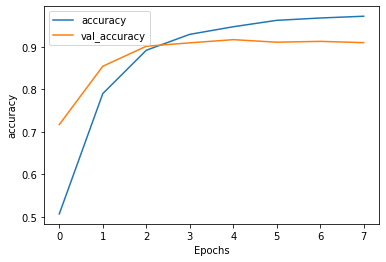

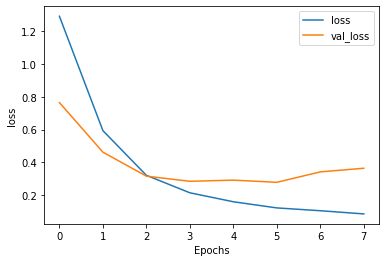

In [ ]:
plot_graphs(Hasil, 'accuracy')
plot_graphs(Hasil, 'loss')

### Save model for deployment

In [ ]:
model.save('EmoDiary_Model.h5')